### Gaussian Mixture Models <br/>
GMM can be used to cluster unlabeled data similar to K-means. <br/>
advantages of gaussian mixture models over k-means is , k-means does not account for variance <br/>
GMMs handle data (clusters) of any shape




In [25]:
# pip install plotnine

In [2]:
%%time
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotnine import *


Wall time: 2.76 s


In [3]:
data = load_iris()

In [4]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
gmm = GaussianMixture(n_components=4)
gmm.fit(df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)','petal width (cm)']])
y_predicted = gmm.predict(df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)','petal width (cm)']])

In [12]:
df['y_predicted'] = y_predicted

In [29]:
df['y_predicted'].unique()

array([1, 0, 2, 3], dtype=int64)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [21]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_predicted,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [13]:
k_range = (1,20) 
models = [ GaussianMixture(n_components=k, covariance_type='diag').fit(df) for k in k_range ]

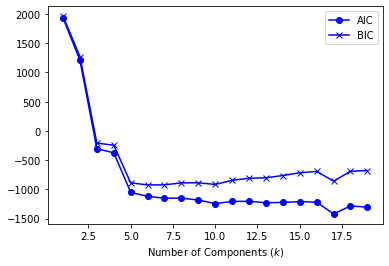

In [20]:
# Compute metrics to determine best hyperparameter
AIC = [m.aic(df) for m in models]
BIC = [m.bic(df) for m in models]
# Plot these metrics
plt.plot(k_range, AIC, 'bo-', label='AIC',)
plt.plot(k_range, BIC, 'bx-', label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()


In [22]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(df['target'], df['y_predicted'])
cm


array([[ 0, 50,  0,  0],
       [43,  0,  6,  1],
       [ 0,  0, 30, 20],
       [ 0,  0,  0,  0]], dtype=int64)

In [23]:
print(accuracy_score(df['target'], df['y_predicted']))

0.2
